In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud

We first perform some Exploration Data Analysis (EDA) on the data

In [53]:
#Load the dataset
file_name = "US Police shootings in from 2015-22.csv"
df = pd.read_csv(file_name)

# Display the first few rows
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,is_armed,year,month,day
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,attack,Not fleeing,False,-123.122,47.247,True,Armed,2015,1,2
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,...,attack,Not fleeing,False,-122.892,45.487,True,Armed,2015,1,2
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,other,Not fleeing,False,-97.281,37.695,True,Unarmed,2015,1,3
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,...,attack,Not fleeing,False,-122.422,37.763,True,Unarmed,2015,1,4
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,...,attack,Not fleeing,False,-104.692,40.384,True,Armed,2015,1,4


In [54]:
#Dimensions of the dataset
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)
print("\n")

#Summary of the data
df.info()

Number of rows: 7729
Number of columns: 17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7729 non-null   int64  
 1   name                     7312 non-null   object 
 2   date                     7729 non-null   object 
 3   manner_of_death          7729 non-null   object 
 4   armed                    7520 non-null   object 
 5   age                      7247 non-null   float64
 6   gender                   7709 non-null   object 
 7   race                     6269 non-null   object 
 8   city                     7729 non-null   object 
 9   state                    7729 non-null   object 
 10  signs_of_mental_illness  7729 non-null   bool   
 11  threat_level             7729 non-null   object 
 12  flee                     6854 non-null   object 
 13  body_camera              7729 non

In [55]:
#Analysis of the data
df.describe()


,id,age,longitude,latitude
count,7729.000000,7247.000000,6892.000000,6892.000000
mean,3865.000000,37.178971,-97.059875,36.682999
std,2231.314448,12.966191,16.595557,5.402749
min,1.000000,2.000000,-160.007000,19.498000
25%,1933.000000,27.000000,-112.039000,33.480000
50%,3865.000000,35.000000,-94.226000,36.104500
75%,5797.000000,45.000000,-83.073250,40.032250
max,7729.000000,92.000000,-67.867000,71.301000


In [59]:
#Check for null values in each column
null = df.isnull().sum()
null

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
dtype: int64

In [61]:
#creating 3 new columns(year, month, day) from Date column
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,1,2
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,1,2
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,1,3
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,1,4
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,1,4


<function matplotlib.pyplot.show(close=None, block=None)>

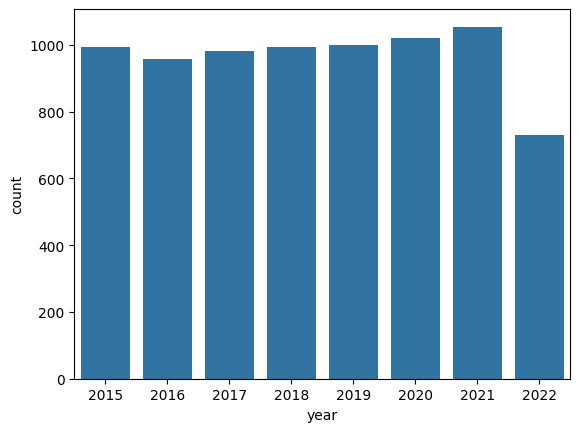

In [62]:
#Deaths over the years
sns.countplot(data = df, x = 'year')
plt.show

In [63]:
#We can see sudden drop in 2022 shootings because of incomplete data.
#The data for the year 2022 is being dropped to avoid bias
data =df[df.year != 2022]
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,1,2
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,1,2
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,1,3
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,1,4
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,6995,Osman Sesay,2021-12-29,shot,gun,27.0,M,B,Silver Spring,MD,False,attack,Car,False,NaN,NaN,True,2021,12,29
6995,6996,Thelonious McKnight,2021-12-29,shot,undetermined,25.0,M,B,Paterson,NJ,False,undetermined,NaN,False,NaN,NaN,True,2021,12,29
6996,6997,Kadeem Errol Livingston Smith,2021-12-30,shot,gun,28.0,M,B,Pine Hills,FL,False,other,Not fleeing,False,NaN,NaN,True,2021,12,30
6997,6998,NaN,2021-12-31,shot,vehicle,NaN,M,NaN,Beaumont,CA,False,attack,Car,False,NaN,NaN,True,2021,12,31


<ipython-input-66-6a2defce50e0>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-66-6a2defce50e0>:8: UserWarning:


The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.

<ipython-input-66-6a2defce50e0>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-66-6a2defce50e0>:9: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

<ipython-input-66-6a2defce50e0>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-66-6a2defce50e0>:10: UserWarn

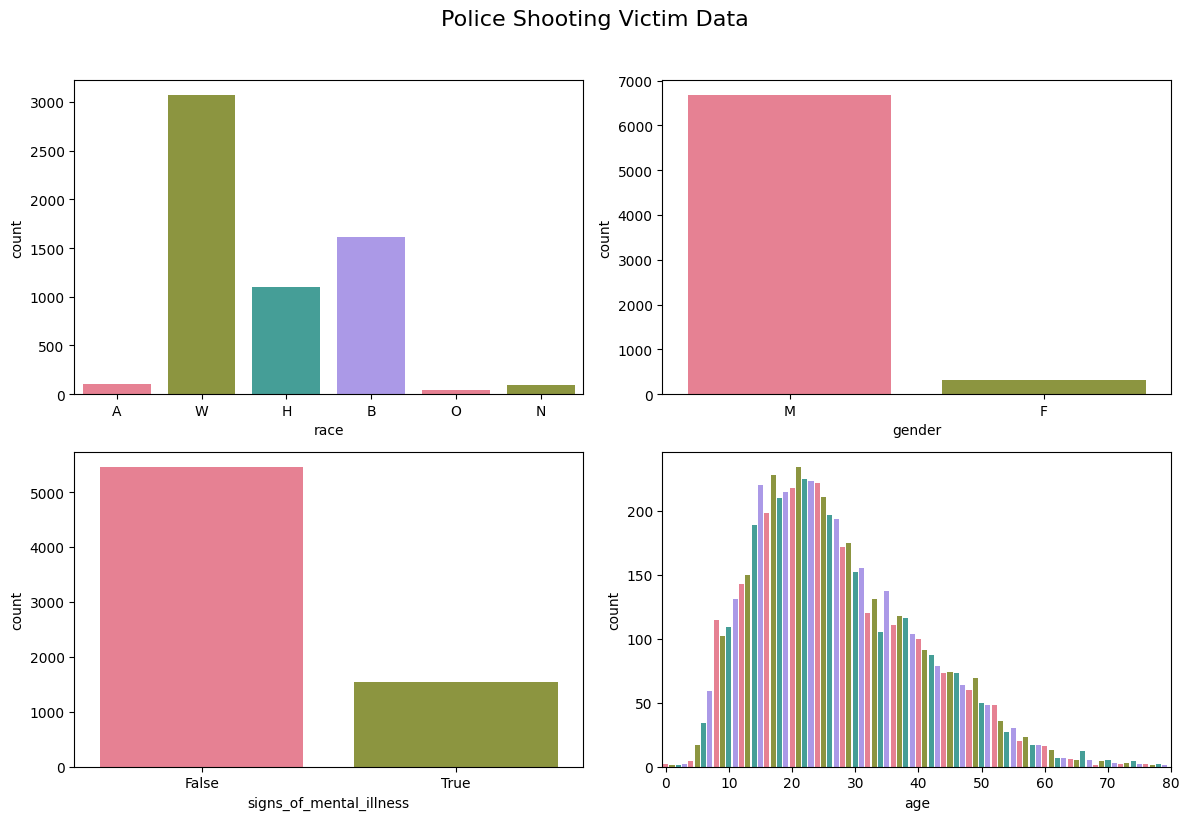

In [66]:
#Police Shooting victim data based on race, gender, signs of mental illness and age

# Define the colors
custom_palette = sns.color_palette("husl", 4)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x='race', orient='v', ax=ax1, data=data, palette=custom_palette)
sns.countplot(x='gender', orient='v', ax=ax2, data=data, palette=custom_palette)
sns.countplot(x='signs_of_mental_illness', orient='v', ax=ax3, data=data, palette=custom_palette)
sns.countplot(x='age', orient='v', ax=ax4, data=data, palette=custom_palette)
ax4.set_xticks(range(0, 90, 10))
ax4.set_xticklabels(range(0, 90, 10))
fig.suptitle('Police Shooting Victim Data', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Are the victims Armed or Unarmed?

<ipython-input-67-c4aa67317cd0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-c4aa67317cd0>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




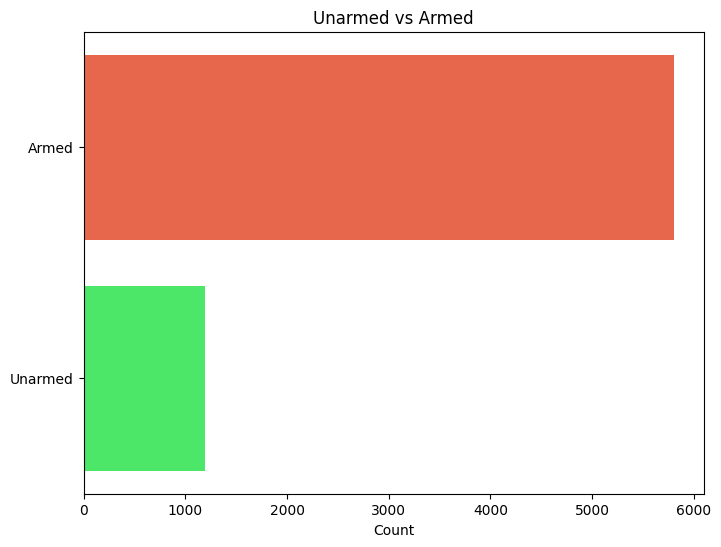

In [67]:
#Determining the unarmed weapons
unarmed_weapons = ['unarmed', 'toy weapon', np.nan, 'undetermined', 'unknown weapon']
data['is_armed'] = data['armed'].apply(lambda x: 'Armed' if x not in unarmed_weapons else 'Unarmed')
unarmed_data = data[data['is_armed'] == 'Unarmed']
armed_data = data[data['is_armed'] == 'Armed']

#Define the colors
colors = ['#FF5733', '#33FF57']
fig = plt.figure(figsize=(8, 6))
armed_counts = data['is_armed'].value_counts()

#Create a horizontal bar chart
sns.barplot(x=armed_counts, y=armed_counts.index, palette=colors)

plt.xlabel('Count')
plt.ylabel('')
plt.title('Unarmed vs Armed')
plt.show()


In [70]:
shot_by_arms = armed_data['armed'].value_counts()
top_values = shot_by_arms[:30]
shot_by_arms[:30]

armed
gun                    4017
knife                  1008
vehicle                 244
machete                  55
Taser                    36
sword                    26
ax                       24
gun and knife            24
gun and vehicle          21
baseball bat             20
hammer                   19
BB gun                   17
screwdriver              17
sharp object             17
metal pipe               16
hatchet                  14
gun and car              13
box cutter               13
pair of scissors         10
crossbow                  9
piece of wood             9
vehicle and gun           9
shovel                    8
pipe                      7
rock                      7
meat cleaver              7
baton                     6
straight edge razor       5
blunt object              5
metal object              5
Name: count, dtype: int64

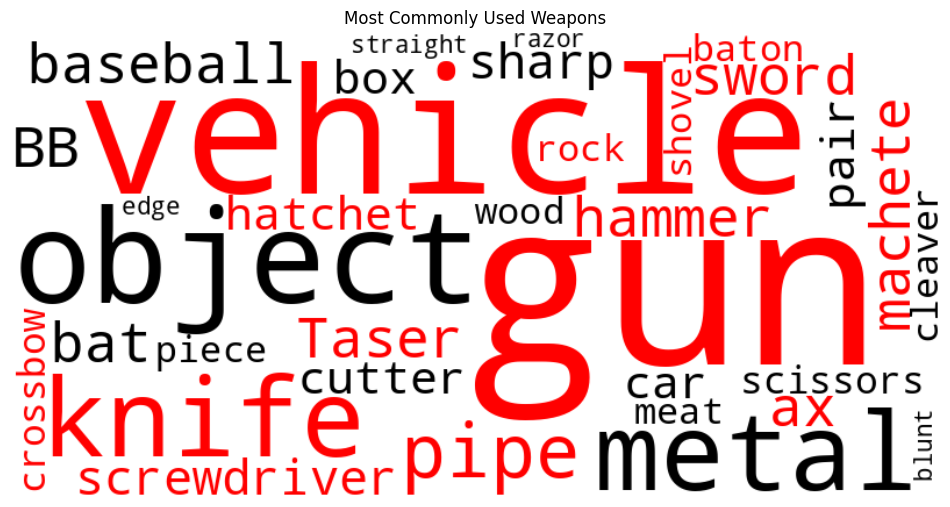

In [69]:
#Generate red color
def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in top_values.index:
        return "rgb(255, 0, 0)"  # red color
    else:
        return "rgb(0, 0, 0)"    # black color for other words

# Concatenate the weapons as text for word cloud
weapons_text = ' '.join(top_values.index)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white', color_func=red_color_func).generate(weapons_text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Commonly Used Weapons')
plt.axis('off')
plt.show()


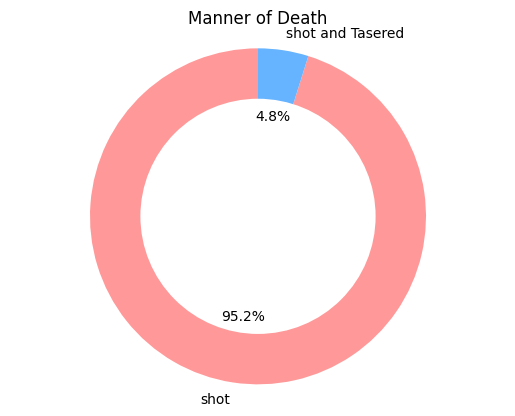

manner_of_death
shot                6660
shot and Tasered     339
Name: count, dtype: int64


In [65]:
unique_manner = data['manner_of_death'].value_counts()
labels = unique_manner.index

#Counts of each category
sizes = unique_manner.values

#Define the colors
colors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots()

#Plotting the pie chart
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

#Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Manner of Death')
plt.show()

print(unique_manner)

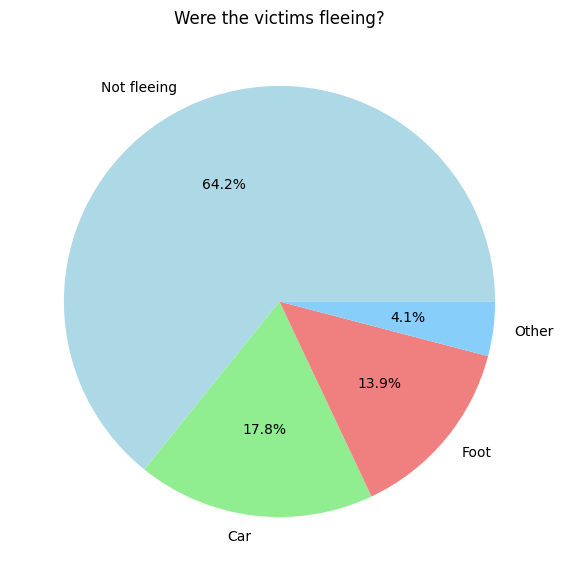

flee
Not fleeing    4125
Car            1143
Foot            893
Other           262
Name: count, dtype: int64


In [71]:
#Were the victims fleeing?
flee_counts = data.flee.value_counts()

# Create a pie chart
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(7,7))
plt.pie(flee_counts, labels=flee_counts.index, autopct='%1.1f%%', colors = colors)  # 'autopct' formats the percentage display
plt.title('Were the victims fleeing?')
plt.show()

# Display the value counts
print(flee_counts)


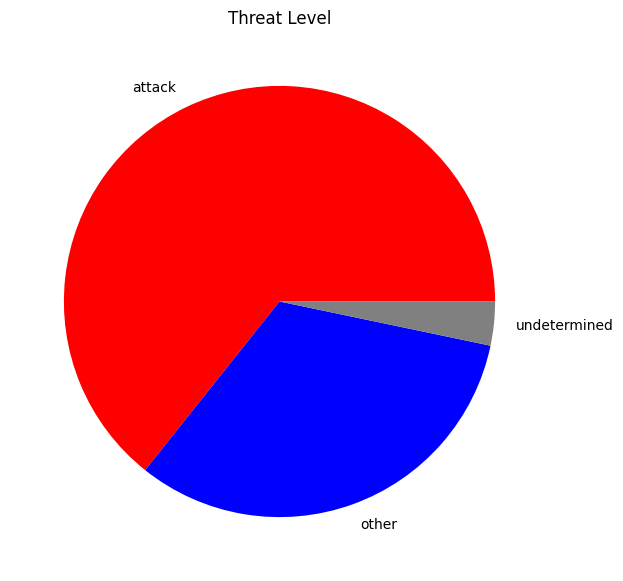

threat_level
attack          4500
other           2269
undetermined     230
Name: count, dtype: int64

In [73]:
#Threat level of the victims
plt.figure(figsize=(7,7))
colors = ['red', 'blue', 'gray']
plt.pie(data.threat_level.value_counts(), labels=['attack', 'other', 'undetermined'], colors=colors)
plt.title('Threat Level')
plt.show()
data.threat_level.value_counts()

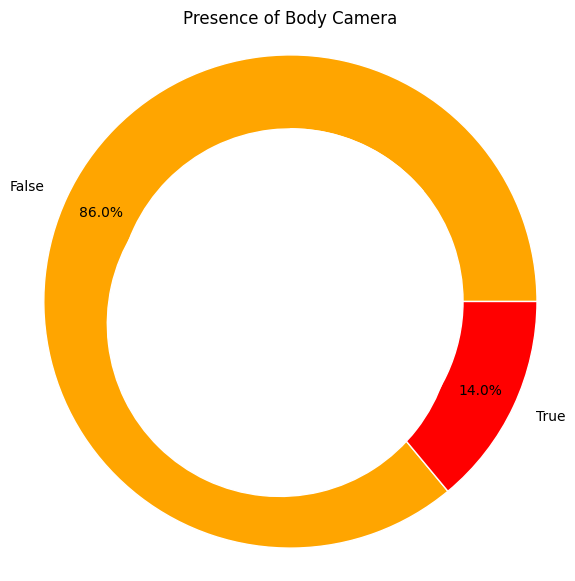

body_camera
False    6021
True      978
Name: count, dtype: int64


In [74]:
body_cam_counts = data.body_camera.value_counts()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(7, 7))

# Create a pie chart with a hole in the center
outer_colors = ['orange', 'red']  # Darker shades of blue and orange
inner_colors = ['white', 'white']  # Darker shades of green and red

wedges, texts, autotexts = ax.pie(body_cam_counts, labels=body_cam_counts.index, autopct='%1.1f%%',
                                   radius=1, pctdistance=0.85, colors=outer_colors,
                                   wedgeprops=dict(width=0.3, edgecolor='w'))

# Offset the greater value
explode = (0.1, 0)

# Create a pie chart with the larger value offset
ax.pie(body_cam_counts, labels=None, autopct=None, startangle=90, colors=inner_colors, explode=explode,
       radius=0.7, wedgeprops=dict(width=0.4, edgecolor='w'))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title
plt.title("Presence of Body Camera")

# Show the plot
plt.show()

# Display the value counts
print(body_cam_counts)


<ipython-input-75-17ad9ef6cf01>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



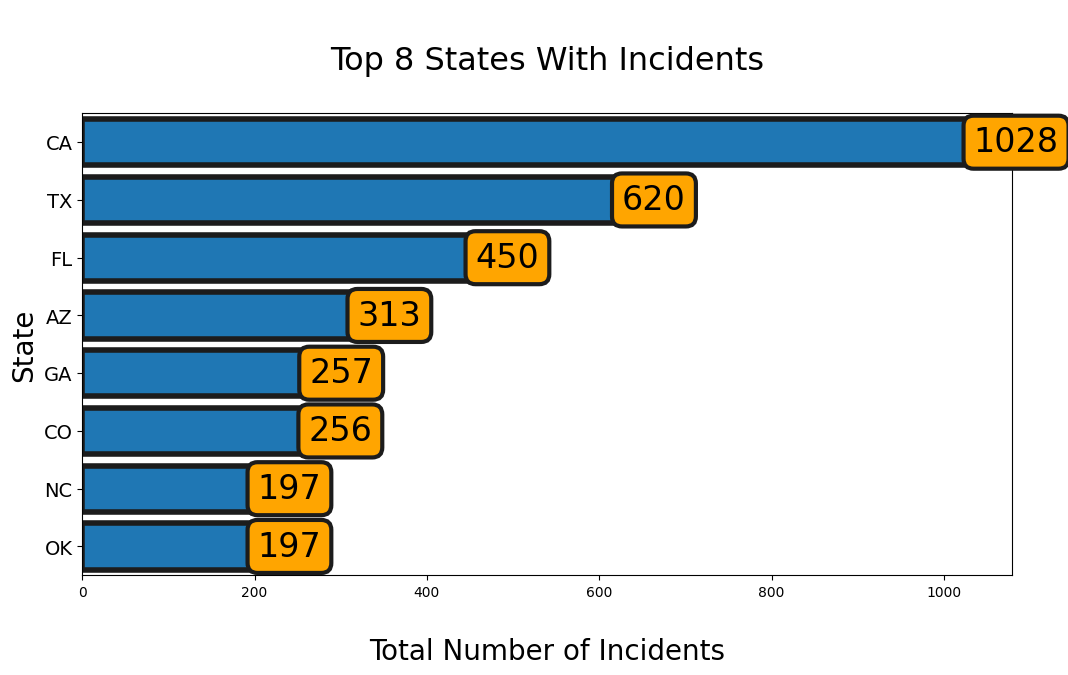

In [75]:
plt.subplots(figsize=(12, 6))
p=sns.countplot(y=data["state"],order=data["state"].value_counts(ascending=False).index[:8],saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_title("\nTop 8 States With Incidents\n",fontsize=23)
p.axes.set_ylabel("State",fontsize=20)
p.axes.set_xlabel("\nTotal Number of Incidents",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0,fontsize=14)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=4,size=24,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.3, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

plt.show()

In [76]:
#Year & State
df_year_state = data.groupby(by=['year','state']).count().date
df_year_state = df_year_state.reset_index()
df_year_state.columns = ['year','state','count']
fig = px.choropleth(df_year_state,
                    locations='state',
                    locationmode="USA-states",
                    color='count',
                    color_continuous_scale="Viridis_r",
                    scope="usa", \
                    animation_frame='year',
                    title="Incidents Observed in Each State Over the Year")

fig.update_layout(width=800)
fig.show()

In [78]:
GB_Y = data.groupby('year')
fig = px.line(GB_Y.count().date, title='Number of Shootings by year',markers=True)
#fig.update_layout(width=800)
fig.show()